# this is the notebook test bed for rbensemble class

In [1]:
# %matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from numpy import linspace,sin,cos,log,exp
import math as m
from math import sqrt,pi,e,exp
from random import random as rand

## local files
from physconsts import *
from rbconsts import *
from rbensemble import RbEnsemble as ensemble

In [10]:
## classes 

class RbEnsemble:
    """ Ensemble of Rb atoms with a momentum distribution specified
        by temperature. Optional spatial distribution.
        
        'T'= temperature
        'size'= number of atoms
        'xdist': optional parameter specifying the initial
            position distribution
    """
    global mRb
    
    
    def __init__(self,T,size=None,xdist=None):
        
        # For efficiency, pre-generate a specified number of atoms
        if size is not None:
            self.size = size
            self.temp = T
            self.v = self.sampling_maxboltzv(self.size,[0,1],self.temp) # rms
            self.p = mRb*self.v # rms
            self.x = np.empty(self.size)
            if xdist is None:
                self.x = np.zeros(self.size)
            elif xdist is 'normal':
                self.x = np.random.normal(0,size=self.size)
        else:
            self.size = 0
            self.temp = T
            self.v = np.array([]) # rms
            self.p = np.array([]) # rms
            self.x = np.array([])
            
    def phasespace(self):
        """ Plots the ensemble in phase space. 1D x and p only for 
            now.
        """
        xmax = max(self.x) # like xmas but better
        xmin = min(self.x) # because i said so
        dx = xmax-xmin
        
        pmax = max(self.p)/mRb
        pmin = min(self.p)/mRb
        dp = pmax-pmin
        
        fig, ax = plt.subplots()
        ax.scatter(self.p/mRb,self.x)#,linestyle=None)
        ax.set(xlabel='p [m/(s mRb)]', ylabel='r [arb]',
               xlim=(pmin-.1*dp,pmax+.1*dp),
               ylim=(xmin-.1*dx,xmax*+.1*dx))
        plt.show()
        
    def vpt(self):
        """ Return a speed from Maxwell-Boltzmann dist. """
        return sampling_maxboltzv(1,[0,1],self.temp)
    
    def xpt(self,domain):
        """ Return a position from a flat dist by default. """
        
        x1,x2 = domain
        x = rand()*(x2-x1) # only works for x1,x2 > 0
        return x
    
    def maxboltzv(self,T,v,normalization=False):
        """ Maxwell-Boltzmann distribution of speeds for 3-dimensional
            gas. Returns f(v) for T. """
        global kB,mRb
        m = mRb

        A = 4*pi*(m/(2*pi*kB*T))**(3/2) # normalization consts
        meanv = sqrt(2*kB*T/m) # the maximum occurs at the mean

        if normalization is True:
            return A
        else:
            return A*v**2*exp(-m*v**2/(2*kB*T))

    def sampling_maxboltzv(self,size,domain,T,vectorial=False,showplot=False):
        """ Sample random speeds with a Maxwell-Boltzmann dist. 
            'size': sample size
            'domain': [v1,v2] the restricted domain of the pdf; e.g.
                a Guassian goes to zero well before inf so we could
                let the domain be a finite region
            'T': temperature
            'vectorial': 
                If False, only return a scalar. 
                Set to True to return velocity vectors with a 
                direction from a flat distribution. 
        """
        global kB,mRb
        m = mRb

        n = size 
        v1,v2 = domain

        mean = sqrt(2*kB*T/m)
        fmax = self.maxboltzv(T,mean) # the maximum
        y_dist = np.empty(n) 
        f_dist = np.empty(n) 
        v_dist = np.empty(n) # this is the distribution we want
        j = 0 # dist index
        while j < n:
            v = (v2-v1)*rand() # rand val on domain of f(x)
            f = self.maxboltzv(T,v)
            y = rand()*fmax # rand val on range of f(x)
            if y <= f:
                y_dist[j]=y
                f_dist[j]=f
                v_dist[j]=v # x vals with approximate gaussian pdf
                j+=1

        # plot distribution as a check:
        if showplot is not False:
            plt.scatter(v_dist,y_dist,c='red',s=10)
            plt.scatter(v_dist,f_dist,c='blue',s=10)
            plt.show()

        return v_dist

<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\prest\AppData\Local\Temp/ipykernel_7608/4049586788.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif xdist is 'normal':


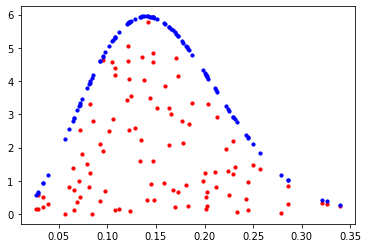

array([0.06104312, 0.10795562, 0.17833405, 0.14125527, 0.20401805,
       0.12173379, 0.20142458, 0.22965417, 0.16580642, 0.12247536,
       0.1578913 , 0.09812029, 0.1336917 , 0.21026497, 0.32095067,
       0.14471429, 0.08544568, 0.18151601, 0.0660091 , 0.09579254,
       0.28599717, 0.14695637, 0.1982479 , 0.10488009, 0.08399364,
       0.22383274, 0.14664333, 0.15077276, 0.18750139, 0.14189121,
       0.18429581, 0.07246422, 0.25723566, 0.20290783, 0.22933518,
       0.21276583, 0.0825426 , 0.16296633, 0.13798998, 0.08192365,
       0.03440721, 0.03432701, 0.16714501, 0.07101018, 0.3394543 ,
       0.02839583, 0.11196282, 0.02901333, 0.12327698, 0.1707069 ,
       0.20036049, 0.06605882, 0.05673661, 0.18341851, 0.32549077,
       0.14405879, 0.13583093, 0.03905671, 0.24248853, 0.23334448,
       0.09284655, 0.0265044 , 0.07935454, 0.09512162, 0.09284284,
       0.0715493 , 0.12804628, 0.12125076, 0.24442254, 0.23130122,
       0.14672224, 0.10746971, 0.10156879, 0.12490608, 0.18099

In [11]:
# maxwboltz test
atoms = RbEnsemble(1) # the temp here actually doesn't matter
atoms.sampling_maxboltzv(100,[0,1],.000100,showplot=True)

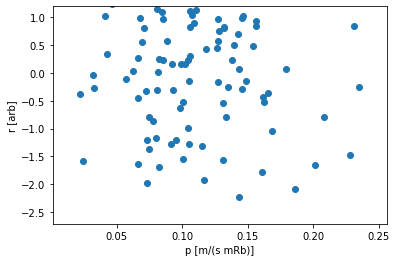

In [6]:
# RbEnsemble test
atoms = RbEnsemble(5e-5,100,xdist='normal')
atoms.phasespace()

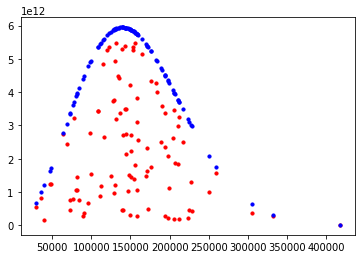

array([159214.9633272 , 206157.15657503, 150201.85613594,  82252.18036997,
       171419.42993189, 150572.19737593, 140746.54366819,  46941.94347335,
       136352.81032639, 223640.06855158, 127416.98604565, 176042.40576267,
        96298.74501098, 116250.00652021, 169869.75685879, 134464.53500416,
       149573.62455489, 210978.7156555 ,  81006.904382  , 129989.56794574,
        64364.85481189, 183750.79163818, 156373.4867844 , 175753.77152909,
       146277.31836658, 153921.75476971, 143158.70160594, 150394.08407733,
       112191.58833543, 108984.12835008, 304992.75747093, 129432.63671416,
       149756.08755957, 143197.80089066,  35956.71552072, 417960.0956149 ,
        88973.17247879, 144517.57567743, 216937.31683617, 189301.64439393,
       109041.01981092, 155149.63505645, 206058.51094635, 210907.65069824,
       158093.72792702, 332341.12450366,  48514.06022256,  99410.79359934,
       190452.61548013,  90758.62573363,  77877.32580253, 128946.02277464,
       131302.77400164,  

In [22]:
## test the class imported from the python script

# maxwboltz test
units=1e-6
atoms = ensemble(1,units=1e-6) # the temp here actually doesn't matter
atoms.sampling_maxboltzv(100,[0,1/units],.000100,showplot=True)